In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil


if os.path.exists('temp_data'):
    shutil.rmtree('temp_data')  # Remove the directory and all its contents
os.makedirs('temp_data')  # Create a new temp_data directory



elbow method to determine cluster sizes

Number of entries in Hit and Run dataset: 1067
Number of entries in Police dataset: 3081
Suggested cluster size for Hit and Run dataset: 7
Suggested cluster size for Police dataset: 6


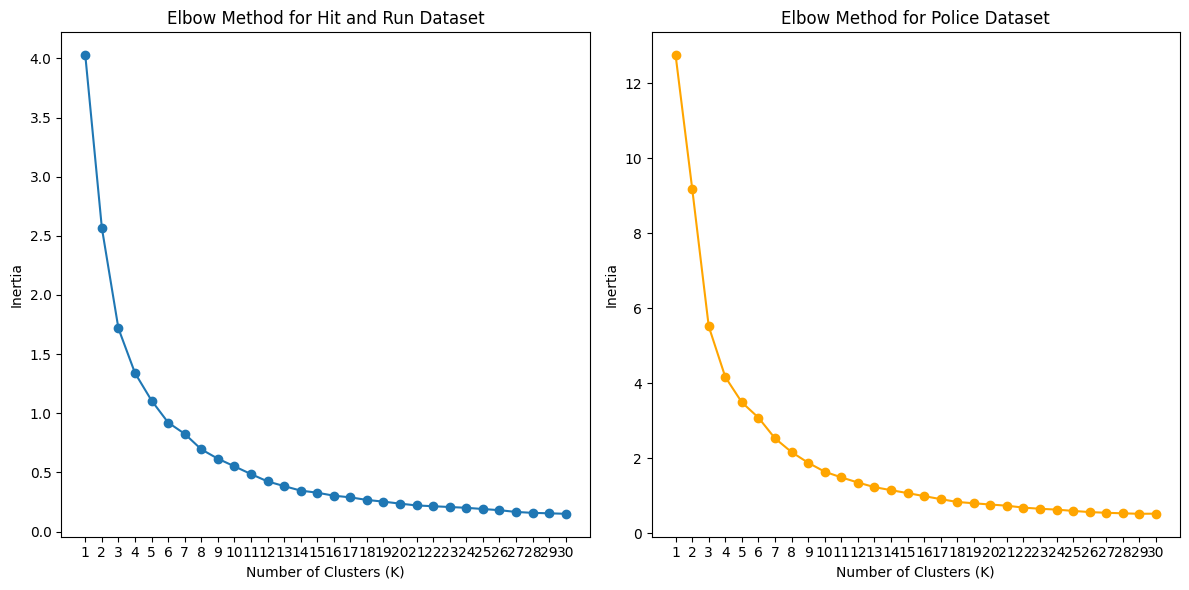

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load the datasets
hitnrun_df = pd.read_csv('data/hitnrun_crash_2023.csv')
#hitnrun_df = pd.read_csv('data/hit_n_run.csv')

police_df = pd.read_csv('data/geocoded_police_2023.csv')

# Get the number of entries in both datasets
hitnrun_count = len(hitnrun_df)
police_count = len(police_df)

print(f"Number of entries in Hit and Run dataset: {hitnrun_count}")
print(f"Number of entries in Police dataset: {police_count}")

# Prepare data for K-means clustering
X_hitnrun = hitnrun_df[['Latitude', 'Longitude']].dropna()  # Ensure to drop NaN values
X_police = police_df[['Latitude', 'Longitude']].dropna()  # Ensure to drop NaN values

# Elbow method for Hit and Run dataset
inertia_hitnrun = []
K = range(1, 31)  # Testing cluster sizes from 1 to 30
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_hitnrun)
    inertia_hitnrun.append(kmeans.inertia_)

# Elbow method for Police dataset
inertia_police = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_police)
    inertia_police.append(kmeans.inertia_)


# Suggested cluster size based on elbow method
def find_elbow_point(inertia):
    # Calculate the differences between consecutive inertia values
    diffs = np.diff(inertia)
    # Calculate the second derivative to find the elbow point
    second_derivative = np.diff(diffs)
    # The elbow point is where the second derivative changes sign
    elbow_point = np.argmin(second_derivative) + 2  # +2 because of the two diff operations
    return elbow_point

# Find and print suggested cluster sizes
suggested_clusters_hitnrun = find_elbow_point(inertia_hitnrun)
suggested_clusters_police = find_elbow_point(inertia_police)

print(f"Suggested cluster size for Hit and Run dataset: {suggested_clusters_hitnrun}")
print(f"Suggested cluster size for Police dataset: {suggested_clusters_police}")

# Plotting the elbow method results
plt.figure(figsize=(12, 6))

# Plot for Hit and Run dataset
plt.subplot(1, 2, 1)
plt.plot(K, inertia_hitnrun, marker='o')
plt.title('Elbow Method for Hit and Run Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)

# Plot for Police dataset
plt.subplot(1, 2, 2)
plt.plot(K, inertia_police, marker='o', color='orange')
plt.title('Elbow Method for Police Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)

plt.tight_layout()
plt.show()


Plot the hit and run data, and save the cluster centroids.


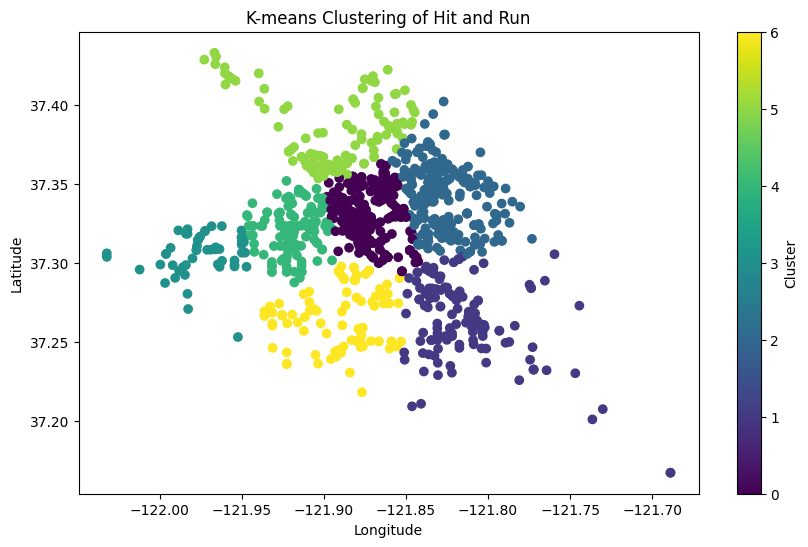

In [14]:
# Read the CSV file
df = pd.read_csv('data/hitnrun_crash_2023.csv')

# Select relevant features for clustering (Latitude and Longitude)
X = df[['Latitude', 'Longitude']].dropna()  # Drop rows with NaN values

# Prune the data to only include points above 37 latitude
df = df[df['Latitude'] > 37]  # Filter the DataFrame
X = df[['Latitude', 'Longitude']].dropna()  # Update X after filtering

# Perform K-means clustering
n_clusters = suggested_clusters_hitnrun  # Update to 30 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)  # Store cluster labels in the DataFrame

# Save the cluster centroids to a CSV file
centroids = kmeans.cluster_centers_  # Get the centroids
centroids_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])  # Create a DataFrame
centroids_df.to_csv('temp_data/hitnrun_centroids.csv', index=False)  # Save to CSV


# Assign cluster labels back to the original DataFrame
df['cluster'] = np.nan  # Initialize the cluster column with NaN
df.loc[X.index, 'cluster'] = clusters 

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Hit and Run')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

Police Misdemeanor Clusters Visualised

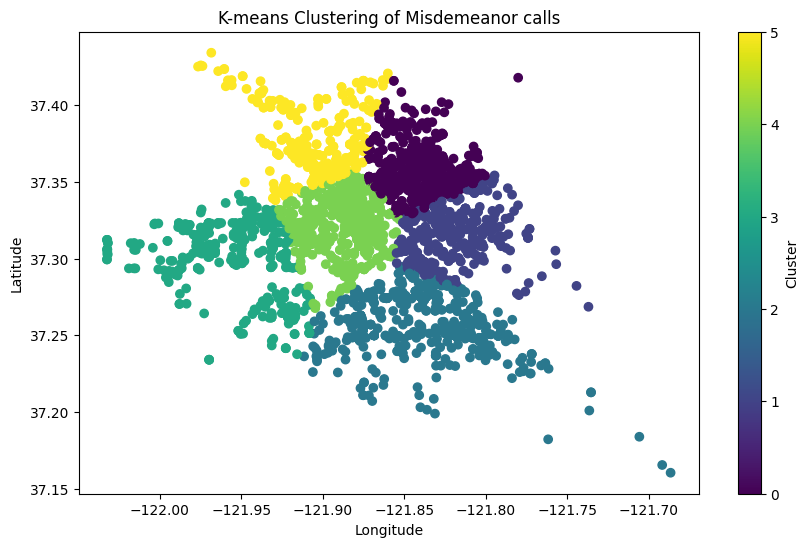

In [4]:
# Read the CSV file
df = pd.read_csv('data/geocoded_police_2023.csv')

# Select relevant features for clustering (Latitude and Longitude)
X = df[['Latitude', 'Longitude']].dropna()  # Drop rows with NaN values

# Prune the data to only include points above 37 latitude
df = df[df['Latitude'] > 37]  # Filter the DataFrame
X = df[['Latitude', 'Longitude']].dropna()  # Update X after filtering

# Perform K-means clustering
n_clusters = suggested_clusters_police  # Update to 30 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)  # Store cluster labels in the DataFrame

# Save the cluster centroids to a CSV file
centroids = kmeans.cluster_centers_  # Get the centroids
centroids_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])  # Create a DataFrame
centroids_df.to_csv('temp_data/police_centroids.csv', index=False)  # Save to CSV


# Assign cluster labels back to the original DataFrame
df['cluster'] = np.nan  # Initialize the cluster column with NaN
df.loc[X.index, 'cluster'] = clusters 

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Misdemeanor calls')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

Centroids Graphed

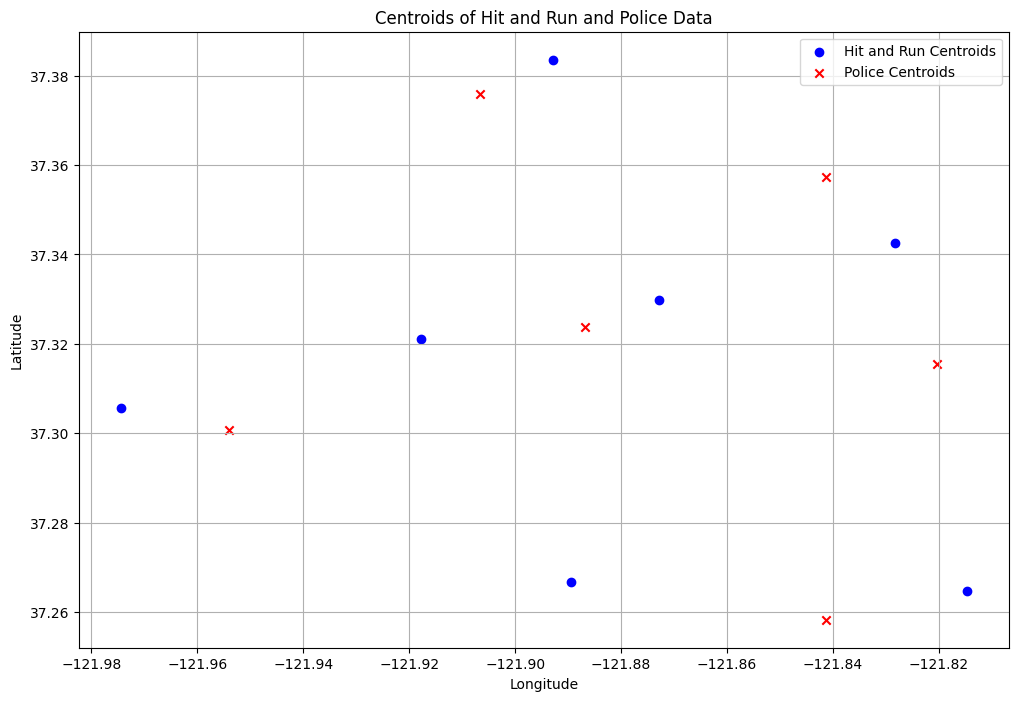

In [5]:

# Load the centroid data
hitnrun_centroids = pd.read_csv('temp_data/hitnrun_centroids.csv')
police_centroids = pd.read_csv('temp_data/police_centroids.csv')

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot hit and run centroids in blue
plt.scatter(hitnrun_centroids['Longitude'], hitnrun_centroids['Latitude'], color='blue', label='Hit and Run Centroids', marker='o')

# Plot police centroids in red
plt.scatter(police_centroids['Longitude'], police_centroids['Latitude'], color='red', label='Police Centroids', marker='x')

# Add titles and labels
plt.title('Centroids of Hit and Run and Police Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Overlay with google maps

In [6]:
import pandas as pd
import os
from dotenv import load_dotenv
import gmplot
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

# Load environment variables
load_dotenv('data/.env')  # Adjust the path to your .env file
API_KEY = os.getenv("googlekey")

# Load the centroid data
hitnrun_centroids = pd.read_csv('temp_data/hitnrun_centroids.csv')
police_centroids = pd.read_csv('temp_data/police_centroids.csv')

# Create a map centered around San Jose
gmap = gmplot.GoogleMapPlotter(37.3382, -121.8863, 13, apikey=API_KEY)

# Overlay the hit and run centroids with increased size
gmap.scatter(hitnrun_centroids['Latitude'], hitnrun_centroids['Longitude'], color='blue', size=280, marker=False, label='Hit and Run Centroids')  # Increased size

# Overlay the police centroids with increased size
gmap.scatter(police_centroids['Latitude'], police_centroids['Longitude'], color='red', size=280, marker=False, label='Police Centroids')  # Increased size

# Draw the map and save to the outputs folder
html_file = "outputs/san_jose_centroids_map.html"  # Updated path
gmap.draw(html_file)

print('File saved to', html_file)

File saved to outputs/san_jose_centroids_map.html


/Users/bill/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Data analysis

Nearest Neighbor Analysis Results:
Total Hit and Run Centroids: 7
Average Distance to Nearest Police Centroid: 0.03 units
Maximum Distance to Nearest Police Centroid: 0.05 units
Minimum Distance to Nearest Police Centroid: 0.02 units

T-Test Results:
T-Statistic: 1.7999
P-Value: 0.0971
Fail to reject the null hypothesis: The nearest neighbor distances are not significantly different from the random distribution.

Neighborhoods of Hit and Run Centroids:
Centroid 1 -> Naglee
Centroid 2 -> Davis and Roeder
Centroid 3 -> Cassell and Foxdale
Centroid 4 -> West Valley
Centroid 5 -> Richmond Menker
Centroid 6 -> Berryessa
Centroid 7 -> South San Jose


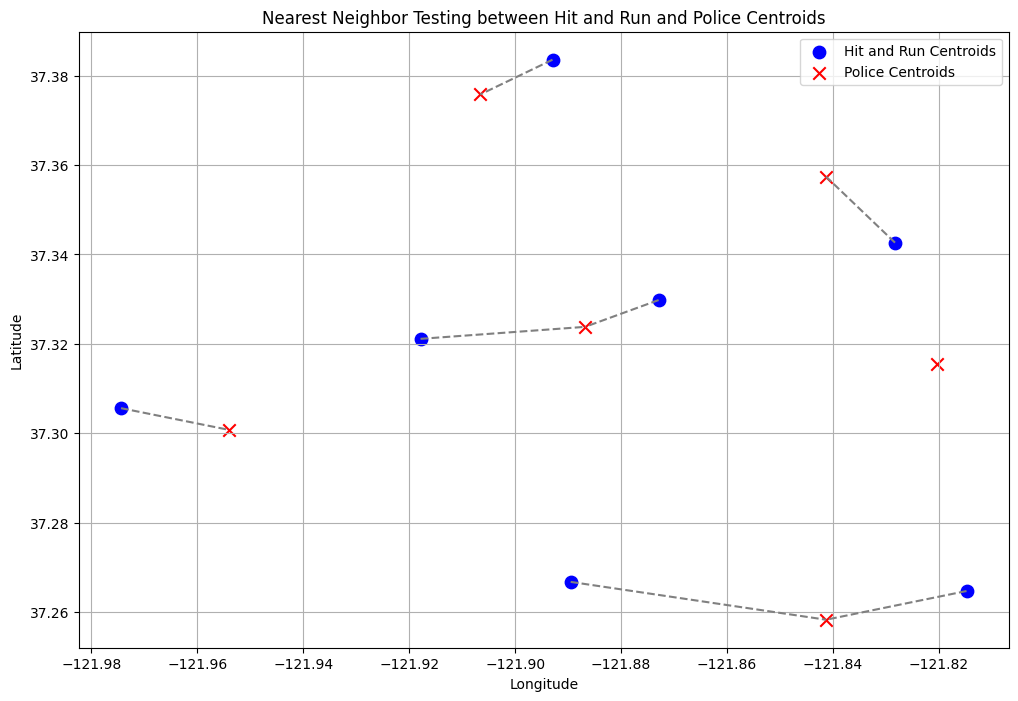

In [19]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sklearn.neighbors import NearestNeighbors
from scipy import stats
import numpy as np

# Load environment variables
load_dotenv('data/.env')  # Adjust the path to your .env file
API_KEY = os.getenv("googlekey")

# Load the centroid data
hitnrun_centroids = pd.read_csv('temp_data/hitnrun_centroids.csv')
police_centroids = pd.read_csv('temp_data/police_centroids.csv')

# Prepare the data for nearest neighbor testing
X_hitnrun = hitnrun_centroids[['Latitude', 'Longitude']].values
X_police = police_centroids[['Latitude', 'Longitude']].values

# Create a NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X_police)

# Find the nearest neighbors for hit and run centroids
distances, indices = nbrs.kneighbors(X_hitnrun)

# Calculate average distance
average_distance = distances.mean()
max_distance = distances.max()
min_distance = distances.min()

# Print analysis results
print("Nearest Neighbor Analysis Results:")
print(f"Total Hit and Run Centroids: {len(X_hitnrun)}")
print(f"Average Distance to Nearest Police Centroid: {average_distance:.2f} units")
print(f"Maximum Distance to Nearest Police Centroid: {max_distance:.2f} units")
print(f"Minimum Distance to Nearest Police Centroid: {min_distance:.2f} units")

# Perform a t-test comparing the nearest neighbor distances against a random distribution
# Generate a random distribution of distances (same size as the nearest neighbor distances)
random_distances = np.random.normal(loc=average_distance, scale=1.0, size=len(distances))

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(distances.flatten(), random_distances)

# Print t-test results
print("\nT-Test Results:")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The nearest neighbor distances are significantly different from the random distribution.")
else:
    print("Fail to reject the null hypothesis: The nearest neighbor distances are not significantly different from the random distribution.")

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot hit and run centroids
plt.scatter(hitnrun_centroids['Longitude'], hitnrun_centroids['Latitude'], color='blue', label='Hit and Run Centroids', marker='o', s=80)

# Plot police centroids
plt.scatter(police_centroids['Longitude'], police_centroids['Latitude'], color='red', label='Police Centroids', marker='x', s=80)

# Plot lines connecting nearest neighbors
for i in range(len(X_hitnrun)):
    plt.plot([hitnrun_centroids['Longitude'].iloc[i], police_centroids['Longitude'].iloc[indices[i][0]]],
             [hitnrun_centroids['Latitude'].iloc[i], police_centroids['Latitude'].iloc[indices[i][0]]],
             color='gray', linestyle='--')



# Function to get neighborhood from coordinates
def get_neighborhood(lat, lon):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat},{lon}&key={API_KEY}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['status'] == 'OK':
            for result in data['results']:
                for component in result['address_components']:
                    if 'neighborhood' in component['types']:
                        return component['long_name']
            return "Neighborhood not found."
        else:
            return f"Error: {data['status']}"
    else:
        return f"Request failed with status code: {response.status_code}"

# Print neighborhoods for each hit and run centroid
print("\nNeighborhoods of Hit and Run Centroids:")
for index, row in hitnrun_centroids.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    neighborhood = get_neighborhood(lat, lon)
    print(f"Centroid {index + 1} -> {neighborhood}")

# Add titles and labels
plt.title('Nearest Neighbor Testing between Hit and Run and Police Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Density analysis

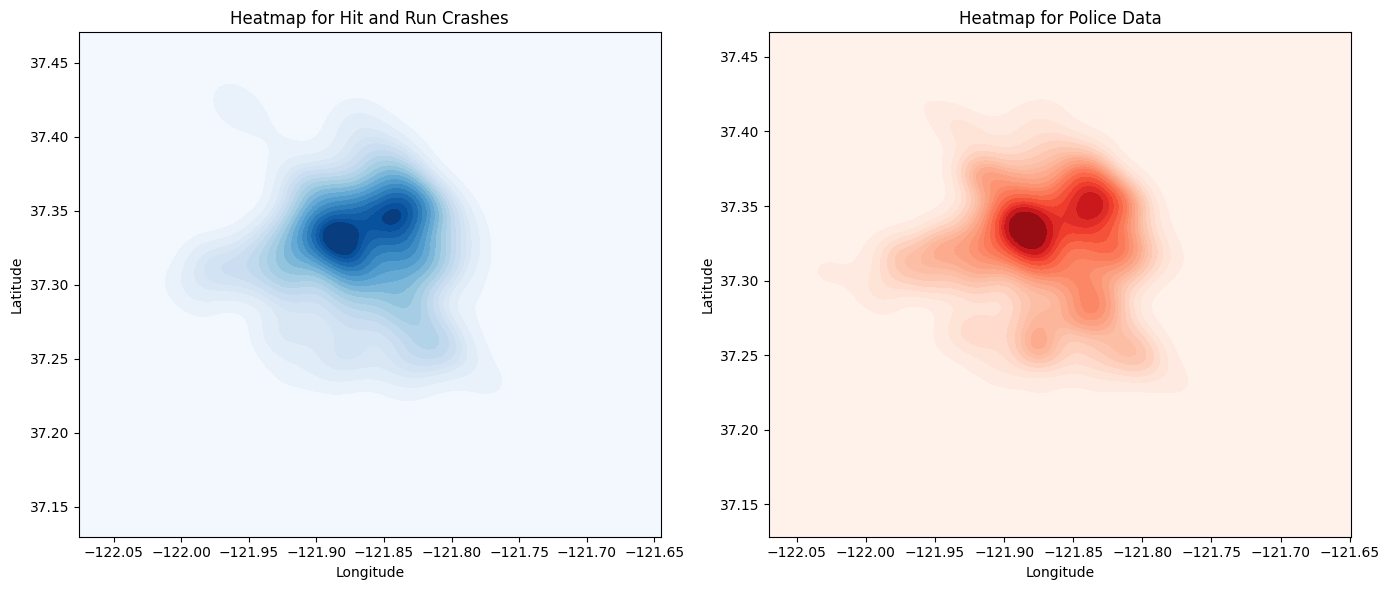

Findings:
1. The heatmap for Hit and Run crashes shows areas of high density, indicating where incidents are more frequent.
2. The police data heatmap highlights areas where police presence is concentrated.
3. Comparing both heatmaps can reveal correlations between hit and run incidents and police activity.
4. Areas with high hit and run density but low police presence may indicate a need for increased patrols or resources.


In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load environment variables
load_dotenv('data/.env')  # Adjust the path to your .env file

# Load the datasets
hitnrun_df = pd.read_csv('data/hitnrun_crash_2023.csv')
police_df = pd.read_csv('data/geocoded_police_2023.csv')

# Remove entries with latitude below 37
hitnrun_df = hitnrun_df[hitnrun_df['Latitude'] >= 37]
police_df = police_df[police_df['Latitude'] >= 37]

# Prepare data for heatmap
hitnrun_data = hitnrun_df[['Latitude', 'Longitude']].dropna()  # Ensure to drop NaN values
police_data = police_df[['Latitude', 'Longitude']].dropna()  # Ensure to drop NaN values

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Heatmap for Hit and Run dataset
plt.subplot(1, 2, 1)
sns.kdeplot(data=hitnrun_data, x='Longitude', y='Latitude', fill=True, cmap='Blues', thresh=0, levels=20)
plt.title('Heatmap for Hit and Run Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Heatmap for Police dataset
plt.subplot(1, 2, 2)
sns.kdeplot(data=police_data, x='Longitude', y='Latitude', fill=True, cmap='Reds', thresh=0, levels=20)
plt.title('Heatmap for Police Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Findings based on the heatmaps
print("Findings:")
print("1. The heatmap for Hit and Run crashes shows areas of high density, indicating where incidents are more frequent.")
print("2. The police data heatmap highlights areas where police presence is concentrated.")
print("3. Comparing both heatmaps can reveal correlations between hit and run incidents and police activity.")
print("4. Areas with high hit and run density but low police presence may indicate a need for increased patrols or resources.")